In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


## Loading Data

In [19]:
import pandas as pd

# Load datasets from kaggle
train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

# View datasets information
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Data Preprocessing

In [20]:
# Print value counts (non-null values) for each column
print("\nTrain Dataset Non-Null Value Counts:")
print(train_data.count())

print("\nTest Dataset Non-Null Value Counts:")
print(test_data.count())


Train Dataset Non-Null Value Counts:
Unnamed: 0               1296675
trans_date_trans_time    1296675
cc_num                   1296675
merchant                 1296675
category                 1296675
amt                      1296675
first                    1296675
last                     1296675
gender                   1296675
street                   1296675
city                     1296675
state                    1296675
zip                      1296675
lat                      1296675
long                     1296675
city_pop                 1296675
job                      1296675
dob                      1296675
trans_num                1296675
unix_time                1296675
merch_lat                1296675
merch_long               1296675
is_fraud                 1296675
dtype: int64

Test Dataset Non-Null Value Counts:
Unnamed: 0               555719
trans_date_trans_time    555719
cc_num                   555719
merchant                 555719
category                 

In [21]:
# Drop 'Unnamed: 0' if it exists
if 'Unnamed: 0' in train_data.columns:
    train_data = train_data.drop('Unnamed: 0', axis=1)

if 'Unnamed: 0' in test_data.columns:
    test_data = test_data.drop('Unnamed: 0', axis=1)

# Verify columns
print("Train Dataset Columns:")
print(train_data.columns)

print("\nTest Dataset Columns:")
print(test_data.columns)

# Print value counts (non-null values) for each column
print("\nTrain Dataset Non-Null Value Counts:")
print(train_data.count())

print("\nTest Dataset Non-Null Value Counts:")
print(test_data.count())

Train Dataset Columns:
Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

Test Dataset Columns:
Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

Train Dataset Non-Null Value Counts:
trans_date_trans_time    1296675
cc_num                   1296675
merchant                 1296675
category                 1296675
amt                      1296675
first                    1296675
last                     1296675
gender                   1296675
street                   1296675
city                     1296675
state             

In [23]:
# Check for null data
print("Null Data in Train Dataset:")
print(train_data.isnull().sum())

print("\nNull Data in Test Dataset:")
print(test_data.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows in Train Dataset:")
print(train_data.duplicated().sum())

print("\nDuplicate Rows in Test Dataset:")
print(test_data.duplicated().sum())

Null Data in Train Dataset:
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Null Data in Test Dataset:
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat          

## Exploratory Data Analysis (EDA)

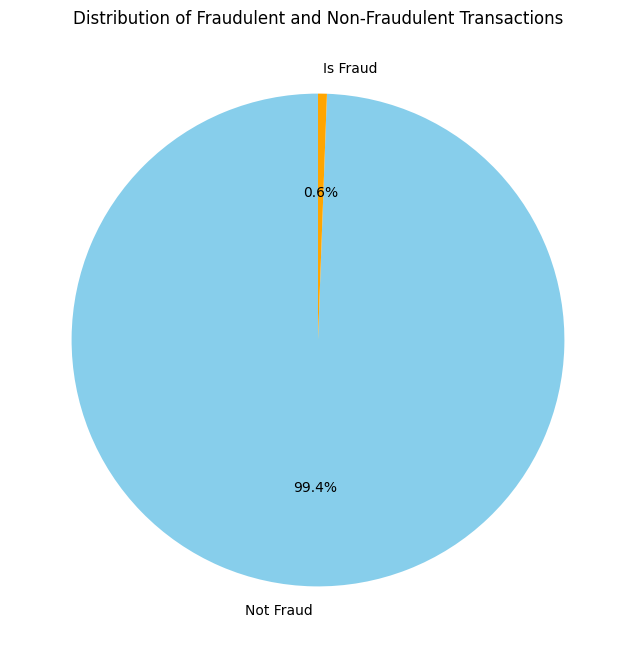

In [24]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'is_fraud' column
fraud_counts = train_data['is_fraud'].value_counts()

# Plot the pie chart
# Define labels for the pie chart
labels = ['Not Fraud', 'Is Fraud']

# Plot the pie chart
plt.figure(figsize=(8, 8))
fraud_counts.plot.pie(
    autopct='%1.1f%%',         # Show percentages
    startangle=90,             # Rotate the pie chart
    colors=['skyblue', 'orange'],  # Colors for the slices
    labels=labels              # Add labels to the slices
)
plt.title("Distribution of Fraudulent and Non-Fraudulent Transactions")
plt.ylabel("")  # Hide the y-axis label
plt.show()

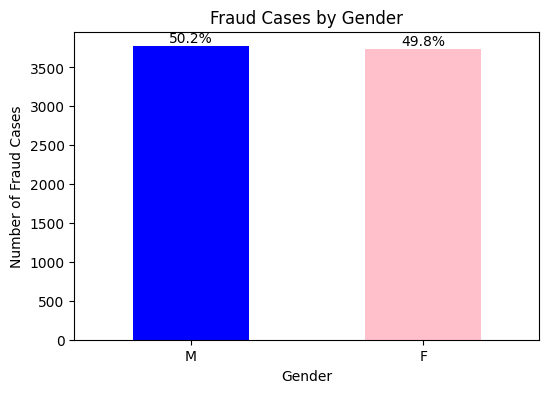

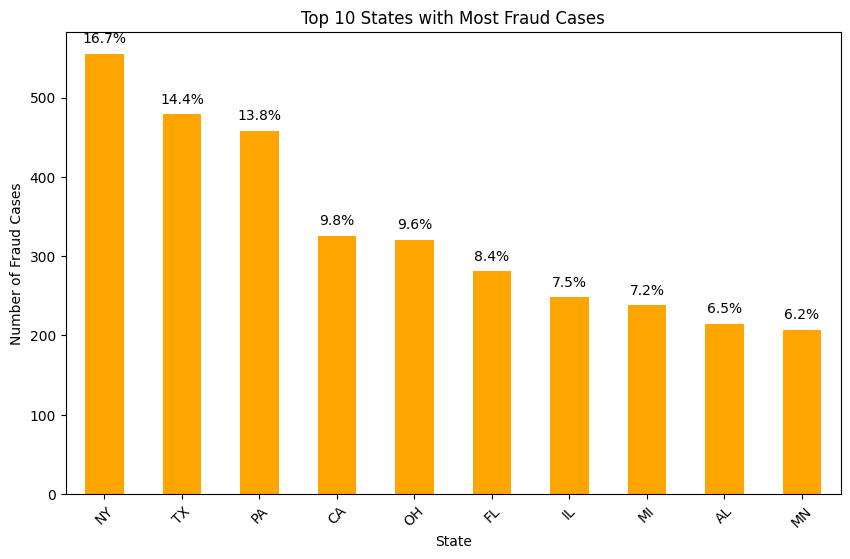

In [7]:
# Filter only fraudulent cases
fraud_data = train_data[train_data['is_fraud'] == 1]

### Fraud by Gender
fraud_by_gender = fraud_data['gender'].value_counts()
gender_percentage = (fraud_by_gender / fraud_by_gender.sum()) * 100  # Calculate percentages

plt.figure(figsize=(6, 4))
fraud_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title("Fraud Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Fraud Cases")
plt.xticks(rotation=0)

# Add percentages on top of bars
for i, v in enumerate(fraud_by_gender):
    plt.text(i, v + 10, f'{gender_percentage.iloc[i]:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

### Fraud by State
fraud_by_state = fraud_data['state'].value_counts().head(10)  # Show top 10 states with the most fraud
state_percentage = (fraud_by_state / fraud_by_state.sum()) * 100  # Calculate percentages

plt.figure(figsize=(10, 6))
fraud_by_state.plot(kind='bar', color='orange')
plt.title("Top 10 States with Most Fraud Cases")
plt.xlabel("State")
plt.ylabel("Number of Fraud Cases")
plt.xticks(rotation=45)

# Add percentages on top of bars
for i, v in enumerate(fraud_by_state):
    plt.text(i, v + 10, f'{state_percentage.iloc[i]:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()


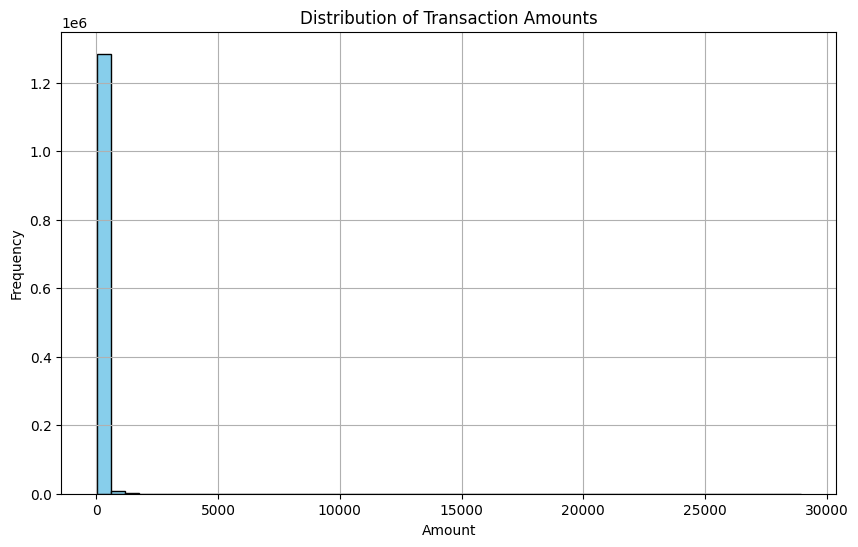

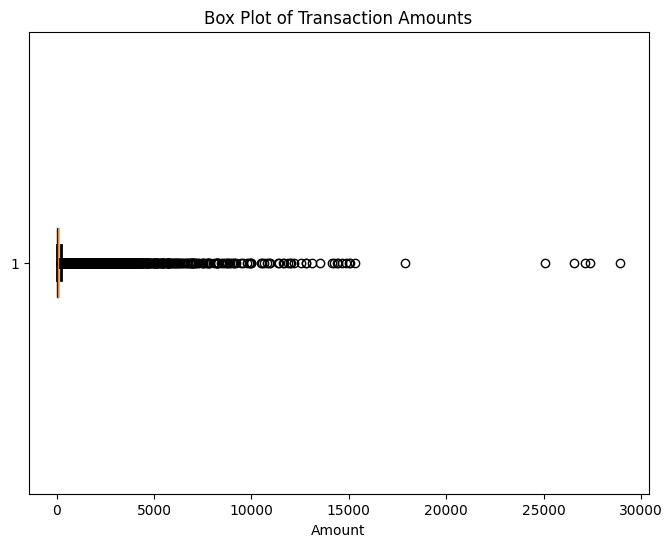

In [8]:
# Check if 'amount' column exists and clean it (e.g., removing NaNs or handling outliers)
if 'amt' in train_data.columns:
    # Clean the data (removing any NaN or missing values in 'amount' column)
    amount_data = train_data['amt'].dropna()

    # Histogram for Amount
    plt.figure(figsize=(10, 6))
    plt.hist(amount_data, bins=50, color='skyblue', edgecolor='black')
    plt.title("Distribution of Transaction Amounts")
    plt.xlabel("Amount")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Box Plot for Amount
    plt.figure(figsize=(8, 6))
    plt.boxplot(amount_data, vert=False, patch_artist=True, 
                boxprops=dict(facecolor='orange', color='black'),
                whiskerprops=dict(color='black', linewidth=1.5),
                capprops=dict(color='black', linewidth=2))
    plt.title("Box Plot of Transaction Amounts")
    plt.xlabel("Amount")
    plt.show()

else:
    print("Amount column not found in the dataset.")


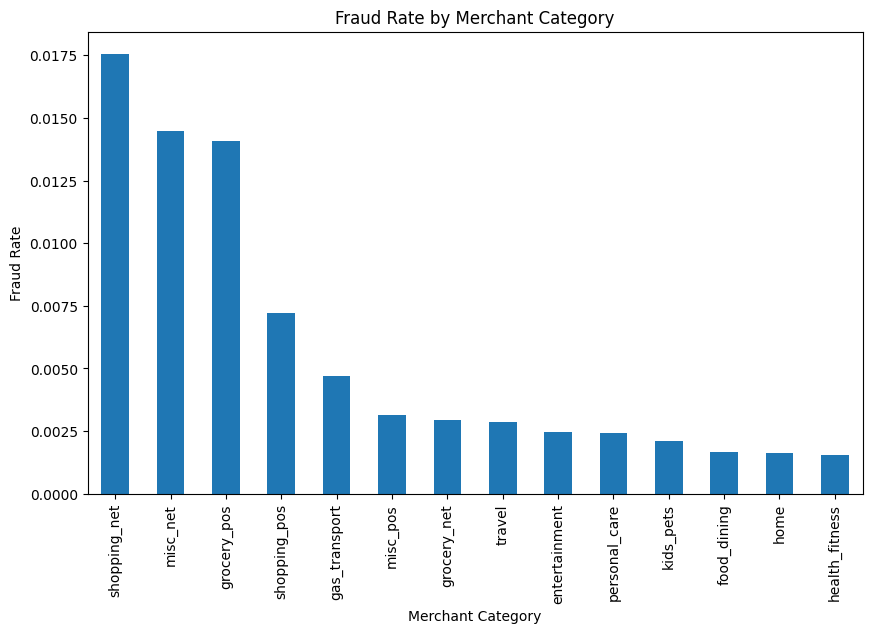

In [9]:
fraud_rate_by_category = train_data.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

fraud_rate_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Fraud Rate by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Rate')
plt.show()

## Feature extraction

In [25]:
# Combine datasets (for simplicity)
data = pd.concat([train_data, test_data])
data.shape

# Drop irrelevant columns
irrelevant_columns = ['trans_date_trans_time', 'cc_num', 'first', 'last', 'street','city', 'zip', 'dob', 'trans_num']
data = data.drop(columns=irrelevant_columns)

# Handle missing values (if any)
data = data.dropna()

### Data transforming

In [26]:
# Encode categorical variables
from sklearn.preprocessing import StandardScaler, LabelEncoder

categorical_cols = ['merchant', 'category', 'state', 'job', 'gender']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [28]:
# Split features and target
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

In [29]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop', 'unix_time']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [30]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [15]:
# Model Training: Random Forest
# from sklearn.ensemble import RandomForestClassifier

# rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
# rf_model.fit(X_train, y_train)

In [16]:
# Model Evaluation
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# y_pred = rf_model.predict(X_test)
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

In [32]:
# # Helper function to train and evaluate the model
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# def evaluate_model(X_train_resampled, y_train_resampled, method_name):
#     # Train the model
#     model = RandomForestClassifier(random_state=42, n_estimators=100)
#     model.fit(X_train_resampled, y_train_resampled)
    
#     # Predict on the test set
#     y_pred = model.predict(X_test)
#     y_pred_proba = model.predict_proba(X_test)[:, 1]
    
#     # Calculate metrics
#     report = classification_report(y_test, y_pred, output_dict=True)
#     confusion = confusion_matrix(y_test, y_pred)
#     roc_auc = roc_auc_score(y_test, y_pred_proba)
    
#     # Store results
#     results[method_name] = {
#         "Confusion Matrix": confusion,
#         "Classification Report": pd.DataFrame(report).transpose(),
#         "ROC-AUC": roc_auc
#     }

# # Initialize results dictionary
# results = {}

# # 1. Original Data
# evaluate_model(X_train, y_train, "Original")

# # 2. Random Oversampling
# ros = RandomOverSampler(random_state=42)
# X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
# evaluate_model(X_train_ros, y_train_ros, "Random Oversampling")

# # 3. Random Undersampling
# rus = RandomUnderSampler(random_state=42)
# X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
# evaluate_model(X_train_rus, y_train_rus, "Random Undersampling")

# # 4. SMOTE
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# evaluate_model(X_train_smote, y_train_smote, "SMOTE")

# # Display Results
# for method, metrics in results.items():
#     print(f"Results for {method}:\n")
#     print("Confusion Matrix:\n", metrics["Confusion Matrix"])
#     print("\nClassification Report:\n", metrics["Classification Report"])
#     print("\nROC-AUC Score:", metrics["ROC-AUC"])
#     print("-" * 50)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np

# Helper function to train and evaluate the model
def evaluate_model(X_train_resampled, y_train_resampled, method_name, model_name, model):
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    
    # Store results
    results[method_name][model_name] = {
        "Confusion Matrix": confusion,
        "Classification Report": pd.DataFrame(report).transpose(),
        "ROC-AUC": roc_auc
    }

# Initialize results dictionary
results = {
    "Original": {},
    "Random Oversampling": {},
    "Random Undersampling": {},
    "SMOTE": {}
}

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)}
    

# Resampling Techniques
resampling_methods = {
    "Original": (X_train, y_train),
    "Random Oversampling": RandomOverSampler(random_state=42).fit_resample(X_train, y_train),
    "Random Undersampling": RandomUnderSampler(random_state=42).fit_resample(X_train, y_train),
    "SMOTE": SMOTE(random_state=42).fit_resample(X_train, y_train)
}

# Evaluate all models for all resampling methods
for method_name, (X_resampled, y_resampled) in resampling_methods.items():
    for model_name, model in models.items():
        evaluate_model(X_resampled, y_resampled, method_name, model_name, model)

# Display Results
for method, models_results in results.items():
    print(f"Results for {method}:\n")
    for model_name, metrics in models_results.items():
        print(f"Model: {model_name}")
        print("Confusion Matrix:\n", metrics["Confusion Matrix"])
        print("\nClassification Report:\n", metrics["Classification Report"])
        print("\nROC-AUC Score:", metrics["ROC-AUC"])
        print("-" * 50)

Results for Original:

Model: Logistic Regression
Confusion Matrix:
 [[552589    235]
 [  2895      0]]

Classification Report:
               precision    recall  f1-score        support
0              0.994788  0.999575  0.997176  552824.000000
1              0.000000  0.000000  0.000000    2895.000000
accuracy       0.994368  0.994368  0.994368       0.994368
macro avg      0.497394  0.499787  0.498588  555719.000000
weighted avg   0.989606  0.994368  0.991981  555719.000000

ROC-AUC Score: 0.8507168556201692
--------------------------------------------------
Model: Decision Tree
Confusion Matrix:
 [[551593   1231]
 [  1014   1881]]

Classification Report:
               precision    recall  f1-score       support
0              0.998165  0.997773  0.997969  552824.00000
1              0.604434  0.649741  0.626269    2895.00000
accuracy       0.995960  0.995960  0.995960       0.99596
macro avg      0.801300  0.823757  0.812119  555719.00000
weighted avg   0.996114  0.995960  0.9960